**California Housing Prices の線形回帰モデル 「1990年の米国国勢調査から得られたカリフォルニア州の住宅価格」**<br />
■事前宣言とデータ読み込み



In [241]:
!python --version

# 以降使用するライブラリをすべて宣言
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas:",pandas.__version__)
print("numpy:",numpy.__version__)
print("matplotlib:",matplotlib.__version__)
print("seaborn:",sns.__version__)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# 各種Warningを非表示に
#import warnings
#warnings.simplefilter('ignore', FutureWarning)
#warnings.simplefilter('ignore', RuntimeWarning)

#以下必要に応じて
#import math
#from sklearn.preprocessing import LabelEncoder
#from sklearn import decomposition
#from sklearn.cluster import KMeans
#from sklearn.metrics import silhouette_score
#from scipy.stats import zscore
#from pandas import plotting
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestRegressor


Python 3.10.12
pandas: 1.5.3
numpy: 1.25.2
matplotlib: 3.7.1
seaborn: 0.13.1


In [242]:
# CSVファイルをアップロード
# ファイルパスのコピー、貼り付け
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/housing.csv')

■データの要約

In [243]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,NEAR BAY
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,NEAR BAY
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,NEAR BAY
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,NEAR BAY
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,NEAR BAY


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [245]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


In [246]:
# 欠損値の確認
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [247]:
# 欠損値　今回は削除ではなく平均値で補間しデータを活かす
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(),inplace=True)

In [248]:
# 処理後のtotal_bedrooms の変化を確認
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.540,3.871,206855.817
std,2.004,2.136,12.586,2181.615,419.267,1132.462,382.330,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,297.000,787.000,280.000,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,438.000,1166.000,409.000,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,643.250,1725.000,605.000,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000


■データの可視化

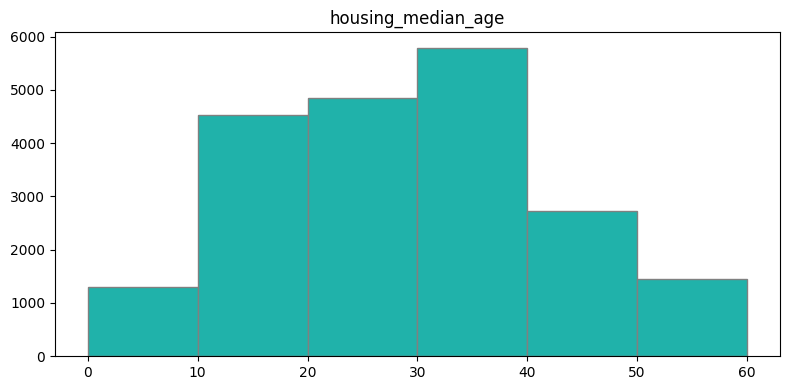

In [249]:
# 年齢（世帯内の中央値）（housing_median_age）のヒストグラム
data_to_plot = df['housing_median_age']
col = data_to_plot.name
bins = [0, 10, 20, 30, 40, 50, 60]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='total_rooms'>

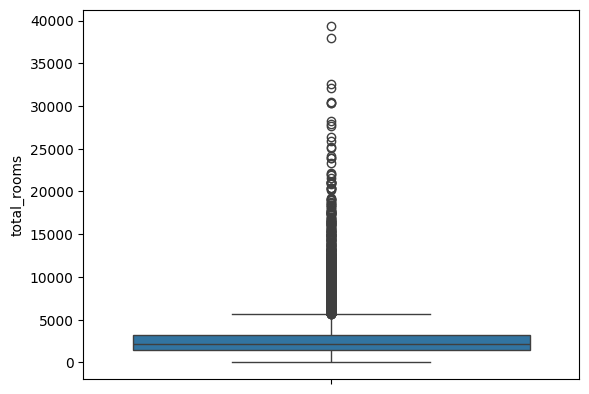

In [250]:
# 部屋総数(total_rooms)の箱ひげ図、外れ値の存在を確認
sns.boxplot(data=df.total_rooms)

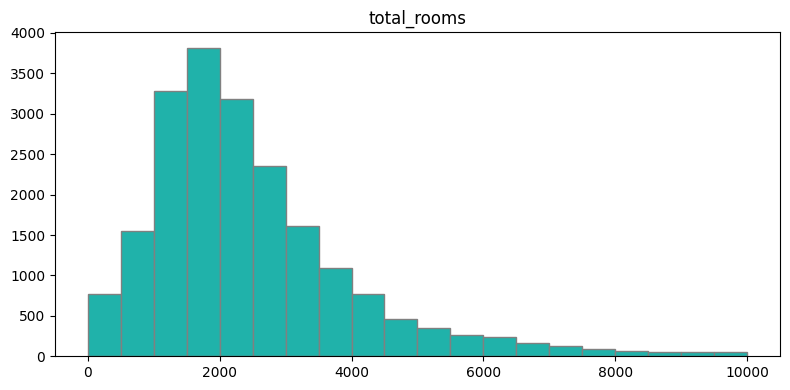

In [251]:
# 部屋総数（total_rooms）のヒストグラム
data_to_plot = df['total_rooms']
col = data_to_plot.name
bins = [0, 500, 1000, 1500, 2000, 2500, 3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='total_bedrooms'>

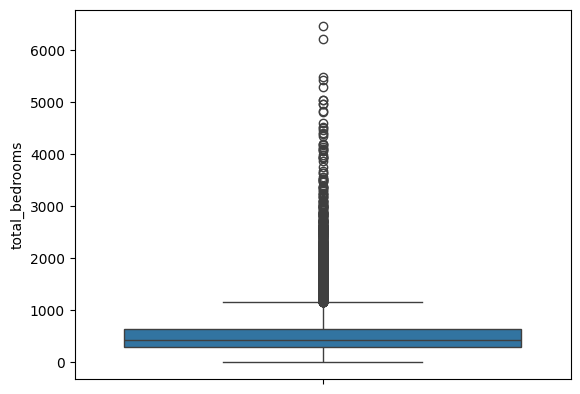

In [252]:
# 寝室総数(total_bedrooms)の箱ひげ図、外れ値の存在を確認
sns.boxplot(data=df.total_bedrooms)

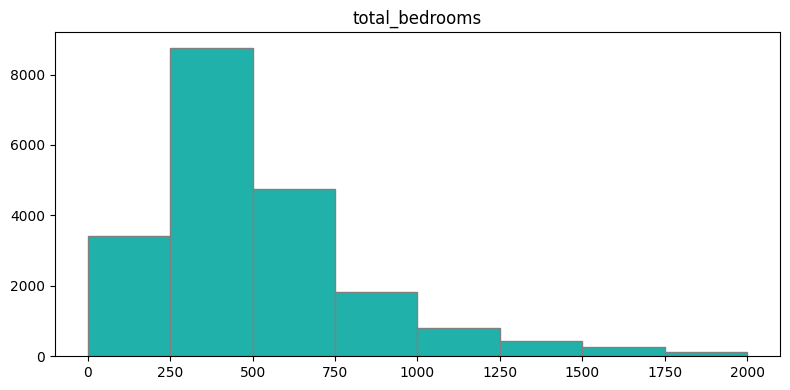

In [253]:
# 寝室総数(total_bedrooms)のヒストグラム
data_to_plot = df['total_bedrooms']
col = data_to_plot.name
bins = [0,250,500,750,1000,1250,1500,1750,2000]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='population'>

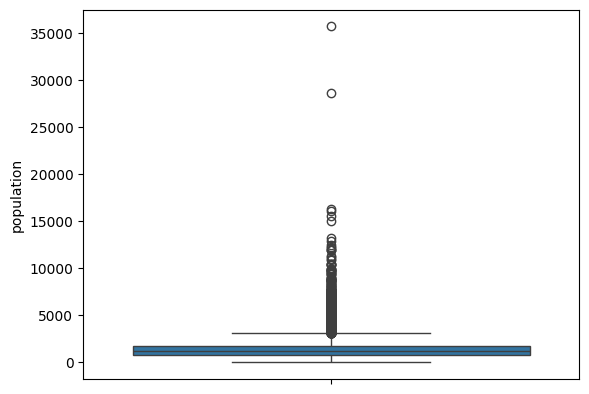

In [254]:
# 人口(population)の箱ひげ図、外れ値の存在を確認
sns.boxplot(data=df.population)

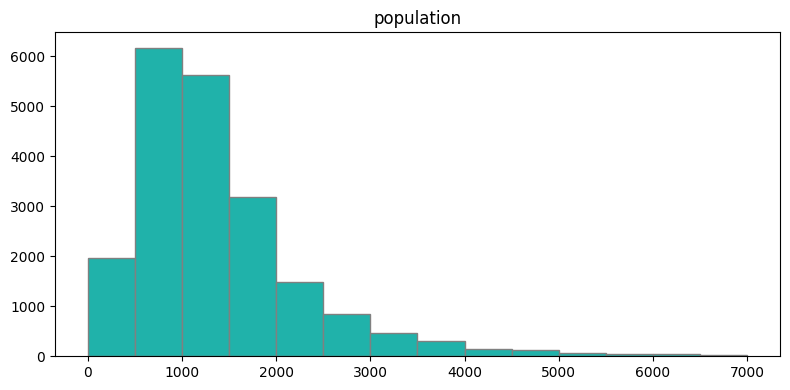

In [255]:
# 人口（population）のヒストグラムを作成
data_to_plot = df['population']
col = data_to_plot.name
bins = [0, 500,1000,1500, 2000,2500, 3000, 3500,4000,4500, 5000, 5500, 6000,6500, 7000]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='households'>

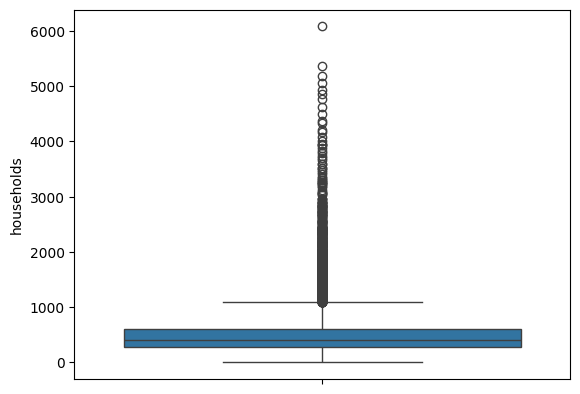

In [256]:
#総世帯数(households)の箱ひげ図、外れ値の存在を確認
sns.boxplot(data=df.households)

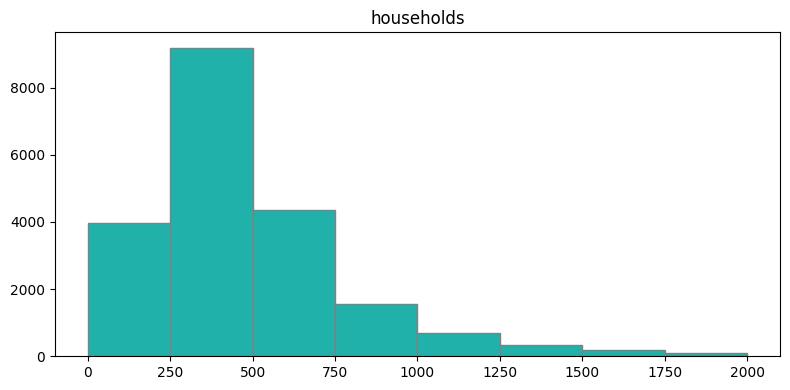

In [257]:
#総世帯数(households)のヒストグラムを作成
data_to_plot = df['households']
col = data_to_plot.name
bins = bins = [0,250,500,750,1000,1250,1500,1750,2000]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='median_income'>

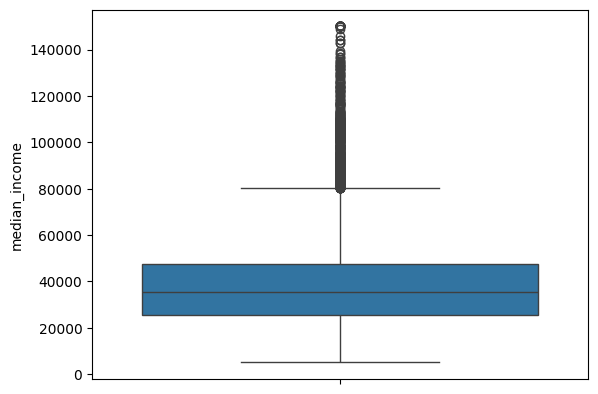

In [258]:
#所得（中央値）(median_income)の箱ひげ図、外れ値の存在を確認
#単位が$1万なので 10000掛ける
sns.boxplot(data=df.median_income*10000)
#sns.boxplot(data=df.median_income)

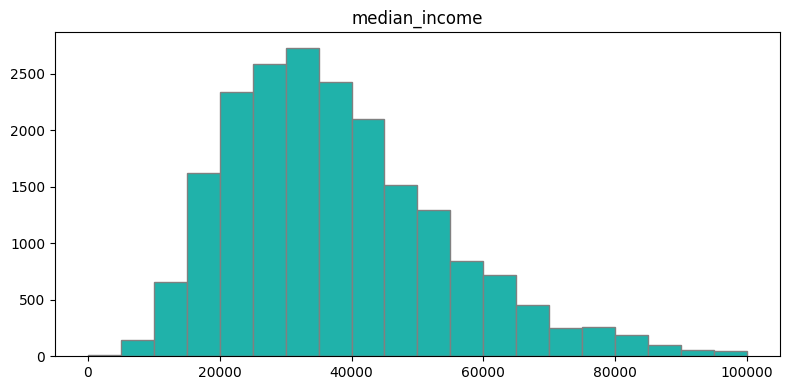

In [259]:
#所得（中央値）(median_income)のヒストグラムを作成
data_to_plot = df['median_income']*10000
col = data_to_plot.name
bins = bins = [0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

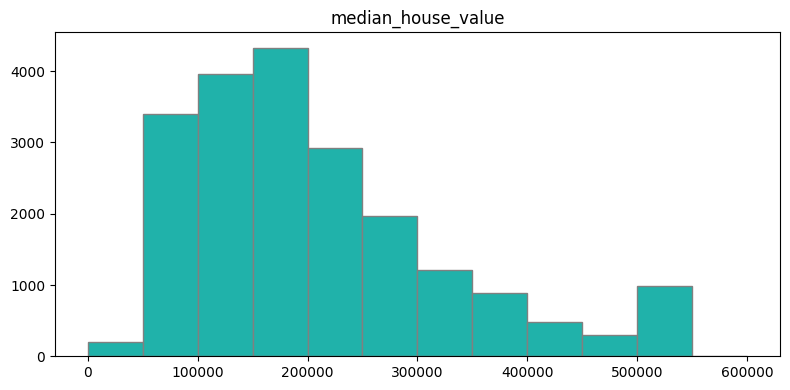

In [260]:
#目的変数：住宅価値（中央値）(median_house_value)のヒストグラムを作成
data_to_plot = df['median_house_value']
col = data_to_plot.name
bins = bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000]

fig, ax = plt.subplots(figsize=(8, 4))
counts, bins, patches = ax.hist(data_to_plot, color="lightseagreen",edgecolor='gray', bins=bins)
ax.set_title(col)

plt.tight_layout()
plt.show()

In [262]:
# ocean_proximity（海との近接度合）の件数
ocpx_sorted_list = df.groupby('ocean_proximity')['median_house_value'].count().sort_values(ascending=False)
ocpx_sorted_list

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: median_house_value, dtype: int64

([<matplotlib.patches.Wedge at 0x7d8799bf9690>,
 [Text(0.19716564197898398, 1.0821856169913806, '<1H OCEAN'),
  Text(-0.8844748613710405, -0.6539909935180139, 'INLAND'),
  Text(0.4958059239440402, -0.9819248880550878, 'NEAR OCEAN'),
  Text(1.033279604741086, -0.3772708025094247, 'NEAR BAY'),
  Text(1.0999996814845978, -0.0008370984311453185, 'ISLAND')],
 [Text(0.10754489562490034, 0.5902830638134803, '44.3%'),
  Text(-0.4824408334751129, -0.3567223601007348, '31.7%'),
  Text(0.27043959487856734, -0.5355953934845933, '12.9%'),
  Text(0.5636070571315014, -0.2057840740960498, '11.1%'),
  Text(0.599999826264326, -0.0004565991442610828, '0.0%')])

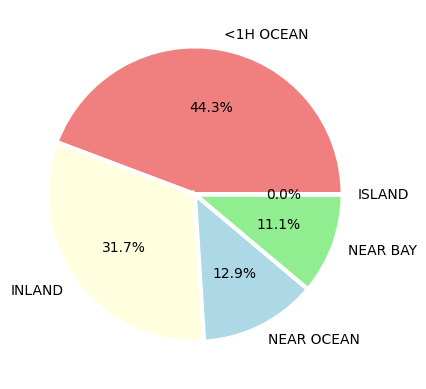

In [263]:
#ocean_proximity（海との近接度合）カテゴリ変数のため、円グラフ
value = ocpx_sorted_list.values
label = ocpx_sorted_list.index.to_list()
colors = ["lightcoral", "lightyellow", "lightblue", "lightgreen", "lightgray"]
plt.pie(value, labels=label, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")

In [264]:
#ラベルエンコーディング　ocean_proximity を数値に
mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
df['ocean_proximity'] = df['ocean_proximity'].map(mapping)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230,37.880,41.000,880.000,129.000,322.000,126.000,8.325,452600.000,4
1,-122.220,37.860,21.000,7099.000,1106.000,2401.000,1138.000,8.301,358500.000,4
2,-122.240,37.850,52.000,1467.000,190.000,496.000,177.000,7.257,352100.000,4
3,-122.250,37.850,52.000,1274.000,235.000,558.000,219.000,5.643,341300.000,4
4,-122.250,37.850,52.000,1627.000,280.000,565.000,259.000,3.846,342200.000,4


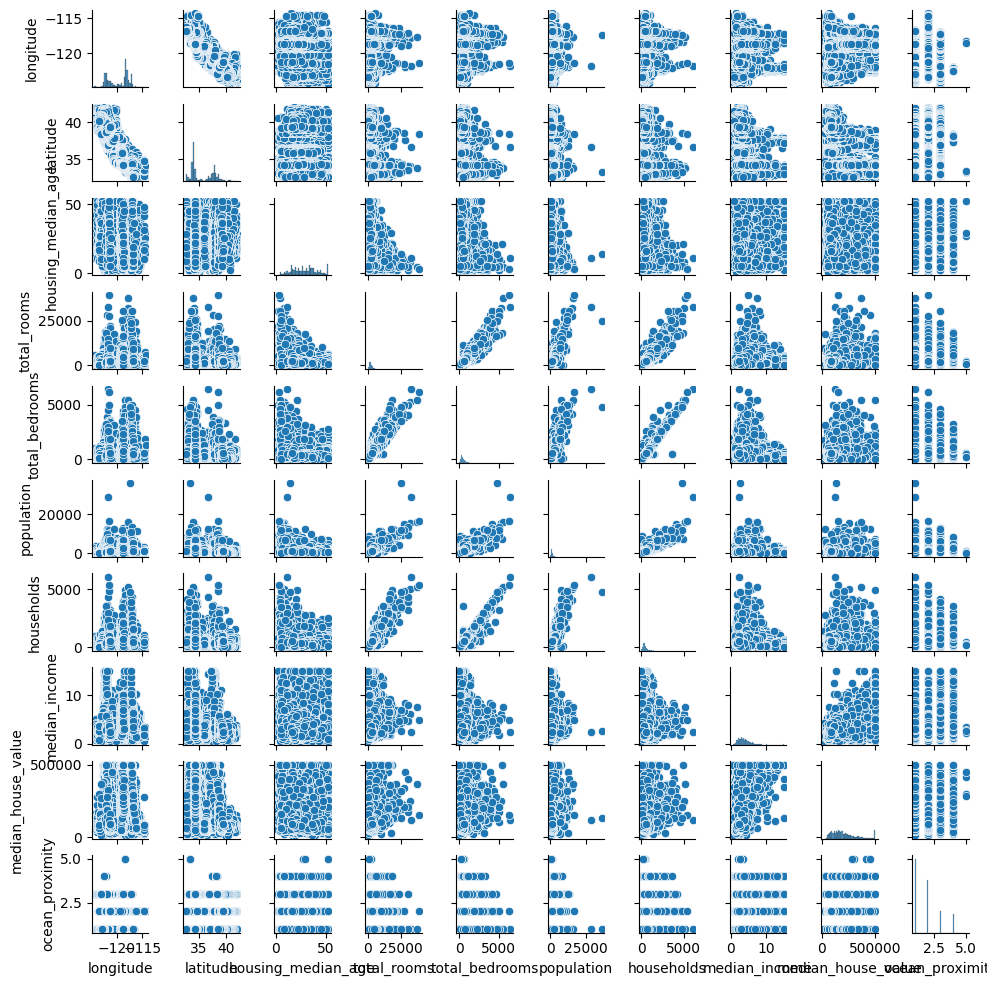

In [265]:
#多変量連関図
#出力に時間がかかるので要注意
sns.pairplot(df, height=1.0)

<Axes: >

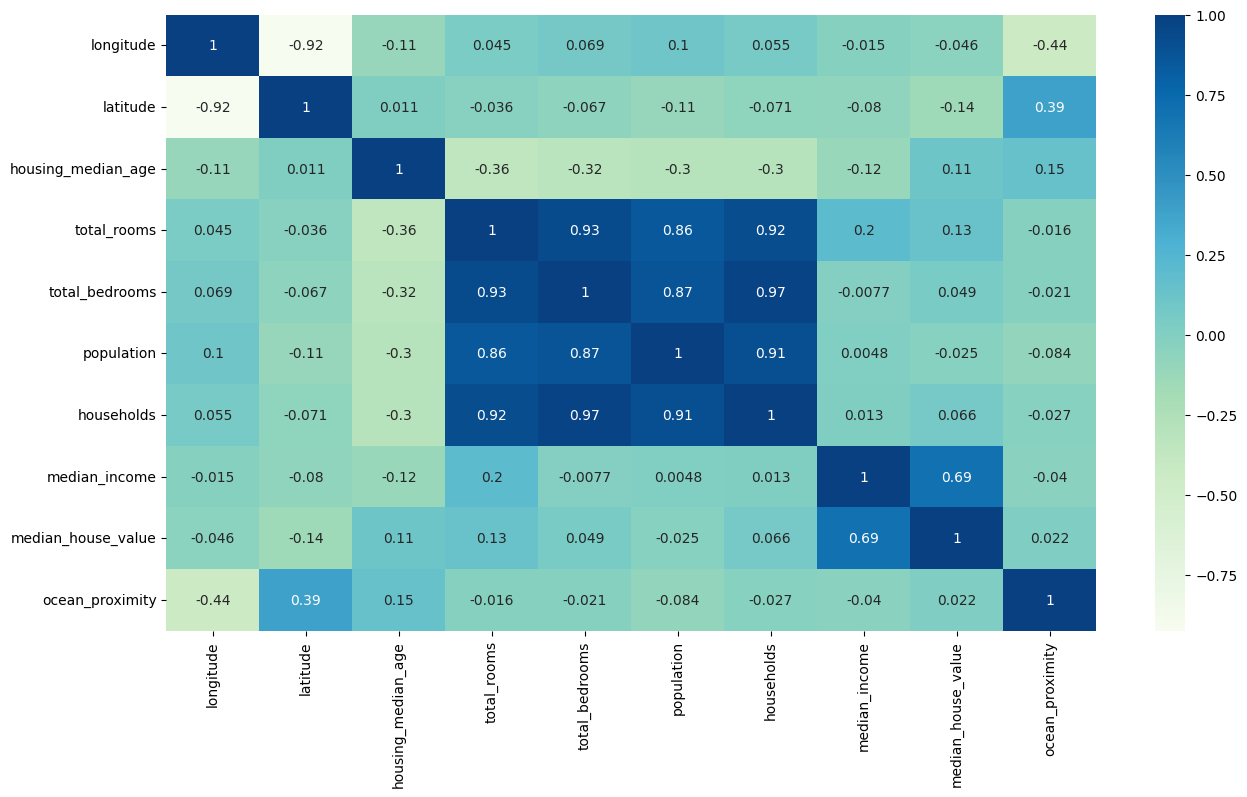

In [266]:
# 相関係数行列を算出し、ヒートマップで出力
#pd.options.display.float_format = '{:.3f}'.format
#df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True,cmap='GnBu')

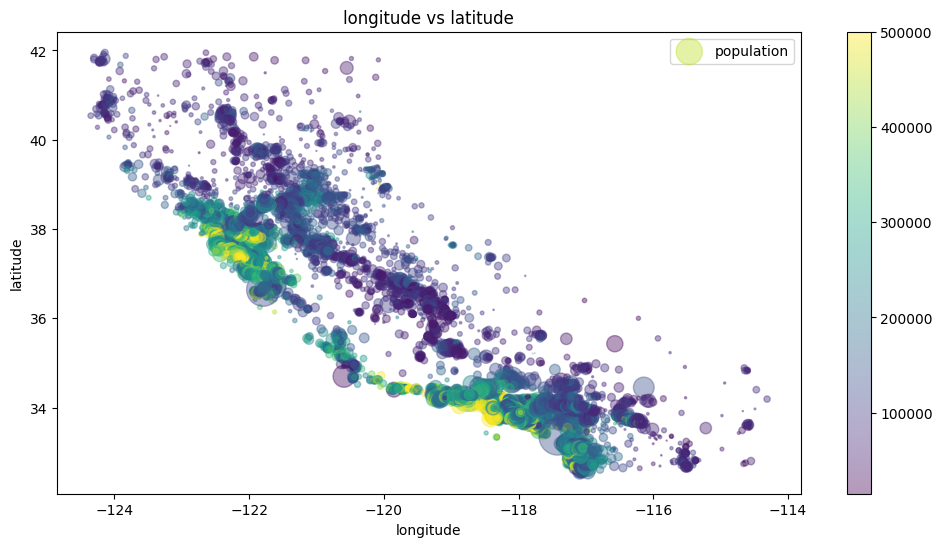

In [269]:
#X軸：経度、Y軸：緯度、プロットサイズ：人口、カラー：住宅価格の4次元プロットで可視化
plt.figure(figsize=(12,6))
sc = plt.scatter(df["longitude"],
                 df["latitude"],
                 alpha=0.4,
                 cmap="viridis", #coolwarmで赤青
                 c=df["median_house_value"],
                 s=df["population"]/50,
                label='population')
plt.colorbar(sc)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("longitude vs latitude")
plt.legend()
plt.show()

In [271]:
#重回帰分析
X = df.drop(['median_house_value'],axis=1)
y = df['median_house_value']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [272]:
#トレーニングスコア、テストスコア、決定係数、平均二乗誤差平方根(RMSE)、平均絶対誤差(MAE)
y_pred = reg.predict(X_test)
reg_score = r2_score(y_test,y_pred)
rmse   = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)

print('Training Score: ', reg.score(X_train, y_train))
print('Testing Score: ', reg.score(X_test, y_test))
print("R2Score: %.3f" % reg_score)
print("RMSE: %.3f" % rmse)
print("MAE : %.3f" % mae)

Training Score:  0.6373833667145292
Testing Score:  0.6281544403553274
R2Score: 0.628
RMSE: 69838.844
MAE : 50879.513


In [273]:
#説明変数別決定係数 reg.coef_ をデータフレームで出力
pd.DataFrame(reg.coef_, df.columns[:-1],columns=['coeficients'])

,coeficients
longitude,-43182.002
latitude,-42693.091
housing_median_age,1171.032
total_rooms,-7.158
total_bedrooms,89.069
population,-39.331
households,71.298
median_income,40229.800
median_house_value,-856.452


In [275]:
#学習と予測を比較
df2 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
df2.head()

,y_test,y_pred
4712,355000.000,241864.982
2151,70700.000,103428.936
15927,229400.000,248597.959
82,112500.000,158237.122
8161,225400.000,284118.261


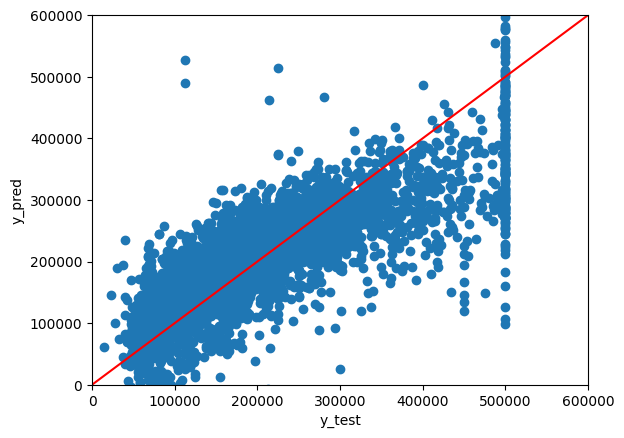

In [276]:
%matplotlib inline
xline = np.linspace(0, 600000, 100000)
yline = xline
plt.plot(xline, yline, color='red')

plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.xlim(0, 600000)
plt.ylim(0, 600000)

plt.scatter(y_test, y_pred)
plt.show()
